['20171123_195852', '20171123_200602', '20171123_202844', '20171123_205127', '20171123_211409', '20171123_213651', '20171123_215933', '20171123_222215', '20171123_224458', '20171123_230740', '20171123_233022', '20171123_235304', '20171124_001547', '20171124_003829', '20171124_010111', '20171124_012353', '20171124_014635', '20171124_020918', '20171124_023200', '20171124_025442', '20171124_031724', '20171124_034007', '20171124_040249', '20171124_042531', '20171124_044813', '20171124_051056', '20171124_053338', '20171124_055620', '20171124_061902', '20171124_064145', '20171124_070427', '20171124_072709', '20171124_074951', '20171124_081234', '20171124_083516', '20171124_085758', '20171124_092041', '20171124_094323', '20171124_100605', '20171124_102847', '20171124_105130', '20171124_111412', '20171124_113654', '20171124_115936', '20171124_122218', '20171124_124500', '20171124_130743', '20171124_133025', '20171124_135307', '20171124_141549', '20171124_143832', '20171124_150114', '20171124_1

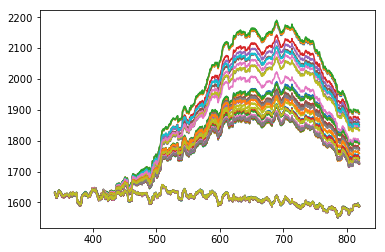

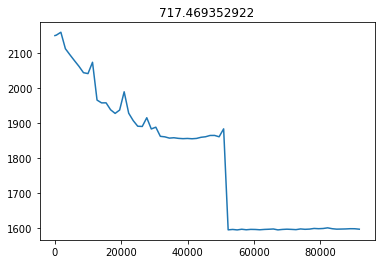

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 18 16:59:34 2017

@author: Daniel
"""
import glob, numpy
import matplotlib.pyplot as plt

# define a function to smooth the data
def movingAv(a,window):
    b = list(a.shape)
    b[0]=b[0]-window+1
    saver = numpy.zeros(b)
    for ind in numpy.arange(window):
        saver=saver+a[ind:a.shape[0]-window+ind+1,]
    saver=saver/window
    return saver

def movingAv1(a,window):
    b = len(a)-window+1
    saver = numpy.zeros(b)
    for ind in numpy.arange(window):
        saver=saver+a[ind:a.shape[0]-window+ind+1,]
    saver=saver/window
    return saver

#def extract_times(files):
def day_time_to_num(date_time):
    
    date_time_stamps = [date_time[i].split('_') for i in range(len(date_time))]
    
    time_in_secs = [((10 * int(date_time_stamps[i][0][6]) + int(date_time_stamps[i][0][7])) * 24 * 60 * 60) +
                    ((10 * int(date_time_stamps[i][1][0]) + int(date_time_stamps[i][1][1])) * 60 * 60) + 
                    ((10 * int(date_time_stamps[i][1][2]) + int(date_time_stamps[i][1][3])) * 60) +
                    (10 * int(date_time_stamps[i][1][4]) + int(date_time_stamps[i][1][5]))
                    for i in range(len(date_time_stamps))]
    print(date_time_stamps[0], time_in_secs[0], (10 * int(date_time_stamps[0][0][6]) + int(date_time_stamps[0][0][7]) * 86400),
         (10 * int(date_time_stamps[0][1][0]) + int(date_time_stamps[0][1][1]) * 60 * 60))
    time_in_secs = [time_in_secs[i] - min(time_in_secs) for i in range(len(time_in_secs))]
    return time_in_secs
    
location = "A_5"

# get all file names for one well
files = glob.glob('C:/Users/newho/Documents/robot-Daniel-V1/Test_1/spectrums/201711*' + location + '.txt')
f = files[0].split(sep='\\')
filenames = [files[i].split(sep='\\')[1] for i in range(len(files))] 
time_stamps = [filenames[i].replace("_Y_" + location + ".txt", "") for i in range(len(filenames))]
print(time_stamps)
times_in_secs = day_time_to_num(time_stamps)

# import one file to get length of data points
scores =  numpy.loadtxt(files[0], delimiter='\t',  skiprows=5)
xvals=scores[:,0]
a = numpy.empty([scores.shape[0],len(files)])


# get the spectrum for each file and store in 'a' columns
for i, file in enumerate(files):
    scores =  numpy.loadtxt(file, delimiter='\t',  skiprows=5)
    a[:,i] = scores[:,1]

# plot
x=movingAv1(xvals,15) # missing x-axis (saved in xvals), keep in mind movingAv function reduces size of 
y=movingAv(a,15) # smooth with a 15 data point window
print(y.shape, x.shape)
plt.plot(x, y)
plt.figure()
index = 800
plt.plot(times_in_secs, y[index, :] )
plt.title("{0}".format(x[index]))
plt.show()